# Finance Data Project 

Exploratory data analysis of stock prices and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set_style('whitegrid')
%matplotlib inline
cf.go_offline()


## Data

We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [3]:
bank_stocks = pd.read_pickle('all_banks')

** Check the head of the bank_stocks dataframe.**

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

** Max Close price for each bank's stock throughout the time period: **

In [5]:
bank_stocks.xs('Close', level = -1, axis = 1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the Returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [7]:
bank_stock_ticker = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for ticker in bank_stock_ticker:
    returns[ticker] = bank_stocks.xs((ticker, 'Close'), axis = 1).pct_change()

returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. **

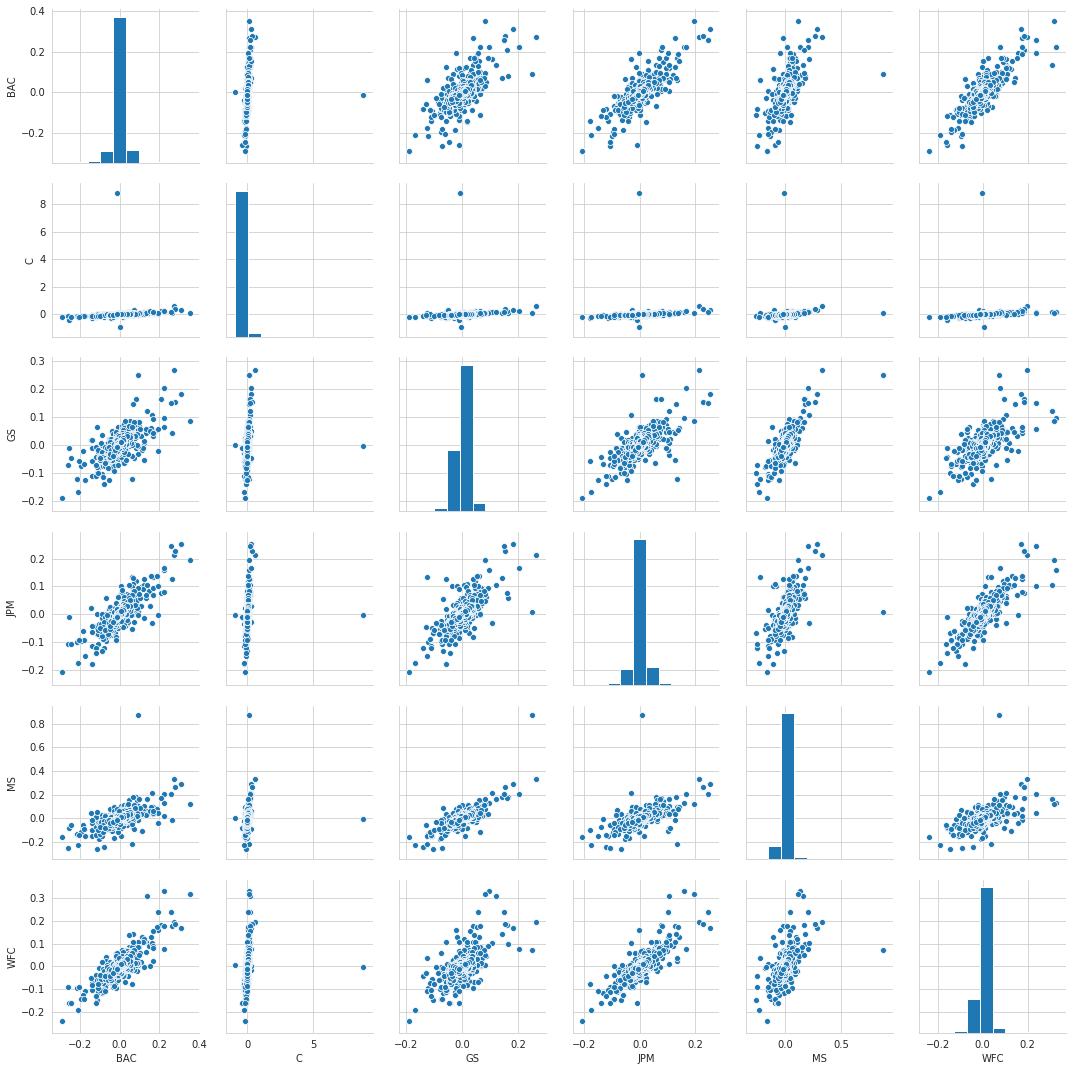

In [8]:
sns.pairplot(returns[1:])

** Plots for CitiGroup looks like a straight lines. It can be explained because of a huge stock crash for Citigroup (2008). **

** Figure out on what dates each bank stock had the best and worst single day returns. **

** The worst single day returns **

In [9]:
returns.idxmin()

BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

 ** 4 of the banks share the same day (20.01.2009) for the worst drop **

** The best single day returns **

In [10]:
returns.idxmax()

BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

** Standard deviation of the returns **

In [11]:
returns.std()

BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

** CitiGroup has the highest std, so this stock can be classified as the riskiest over the entire time period **

** Standard deviation od the return for the year 2015 **

In [12]:
returns.loc["2015"].std()

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

** Morgan Stanley has the highest std for this time period, so this stock can be classified as the riskiest for the year 2015 (but it very close to the BAC) **

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

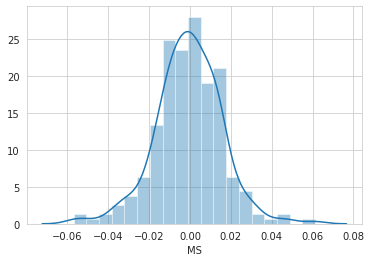

In [13]:
sns.distplot(returns.loc["2015"]["MS"])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

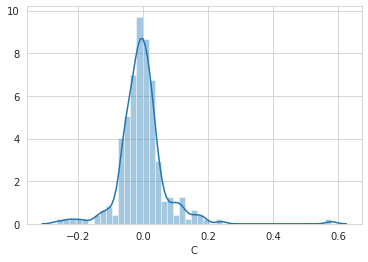

In [14]:
sns.distplot(returns.loc["2008"]["C"])

____
# More Visualization


** Create a line plot showing Close price for each bank for the entire index of time. **

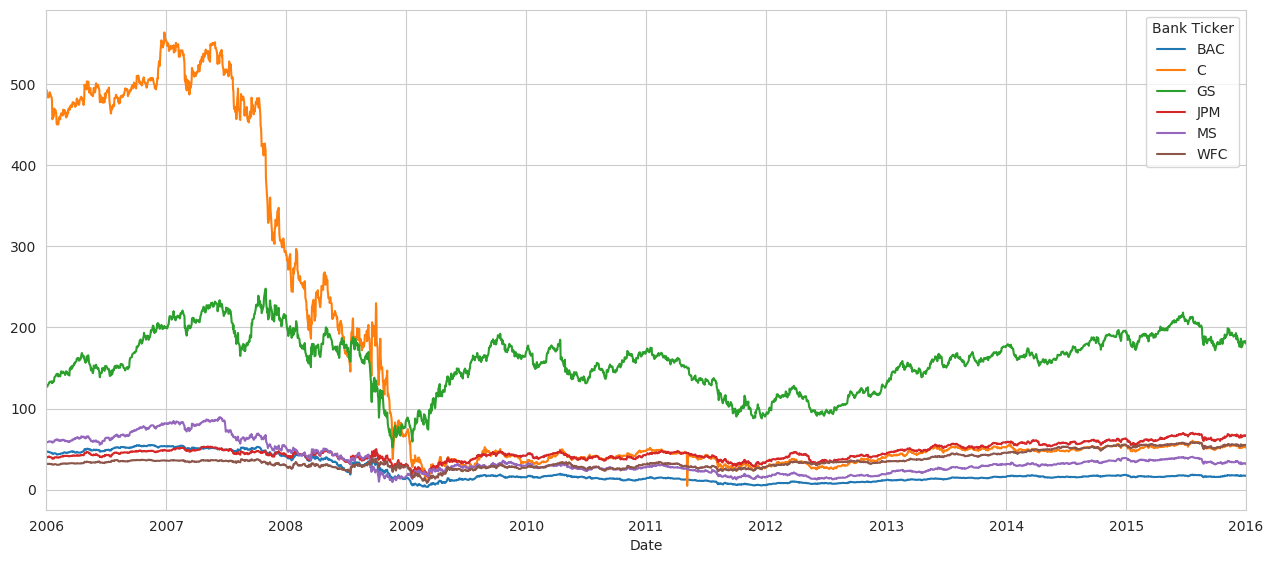

In [15]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
for ticker in bank_stock_ticker:
    ax.plot(bank_stocks.reset_index()['Date'], bank_stocks[ticker]['Close'], label = ticker)

ax.set_xlabel('Date')
ax.set_xlim(['2006', '2016'])
ax.legend(title = 'Bank Ticker')

In [16]:
bank_stocks.xs('Close', level = -1, axis = 1).iplot()

## Moving Averages

Analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

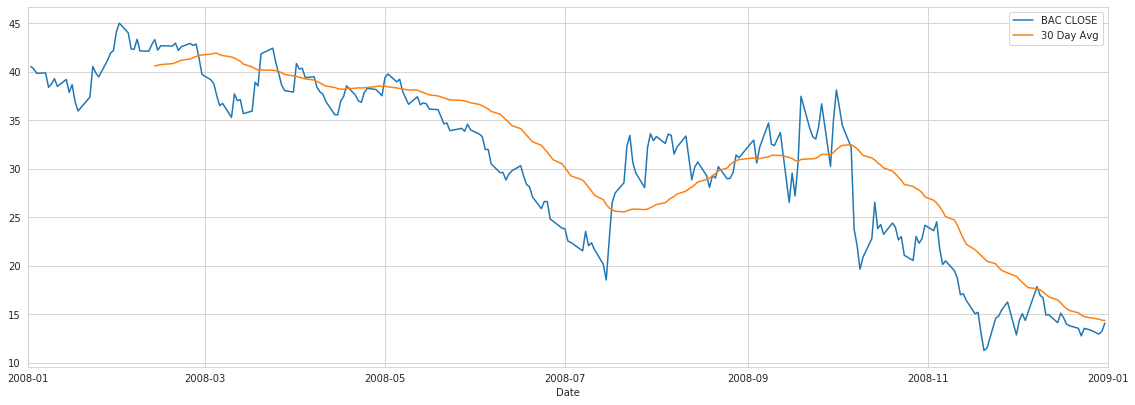

In [17]:
figure = plt.figure(figsize = (15,5))
axes = figure.add_axes([0, 0, 1, 1])

axes.plot(bank_stocks.xs(('BAC', 'Close'), axis = 1).loc["2008"], label = "BAC CLOSE")
axes.plot(bank_stocks.xs(('BAC', 'Close'), axis = 1).loc["2008"].rolling(window = 30).mean(), label = "30 Day Avg")
axes.set_xlabel('Date')
axes.set_xlim(['2008-01', '2009-01'])
axes.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

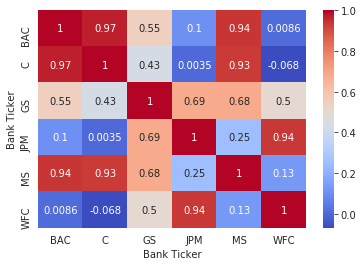

In [18]:
sns.heatmap(bank_stocks.xs('Close', level = -1, axis = 1).corr(), annot = True, cmap = "coolwarm")

** Use seaborn's clustermap to cluster the correlations together:**

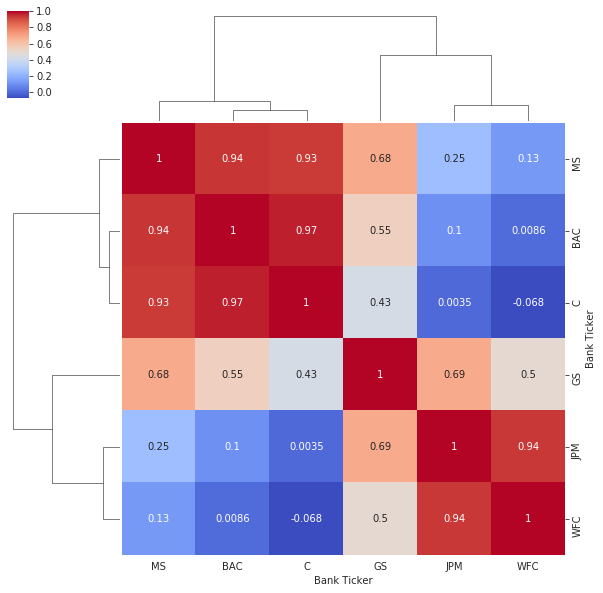

In [19]:
sns.clustermap(bank_stocks.xs('Close', level = -1, axis = 1).corr(), annot = True, cmap = "coolwarm")

In [20]:
bank_stocks.xs('Close', level = -1, axis = 1).corr().iplot(kind = 'heatmap', colorscale = 'rdylbu')

** Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [21]:
bank_stocks['BAC'].loc["2015"][["Open", "High", "Low", "Close"]].iplot(kind = "candle")

** Create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [22]:
bank_stocks['MS']['Close'].loc["2015"].ta_plot(study = "sma")

** Create a Bollinger Band Plot for Bank of America for the year 2015.**

In [23]:
bank_stocks['BAC']['Close'].loc["2015"].ta_plot(study = 'boll')